In [1]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

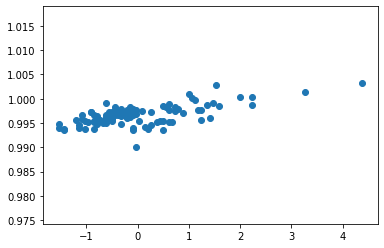

[[[ 1.        ]
  [ 0.60239429]]

 [[ 1.        ]
  [-0.03598116]]

 [[ 1.        ]
  [ 0.60239429]]

 [[ 1.        ]
  [ 0.19615537]]

 [[ 1.        ]
  [-0.67435661]]

 [[ 1.        ]
  [-0.21008356]]

 [[ 1.        ]
  [ 4.37461286]]

 [[ 1.        ]
  [-0.44222008]]

 [[ 1.        ]
  [-0.61632248]]

 [[ 1.        ]
  [-0.50025422]]

 [[ 1.        ]
  [ 1.18273561]]

 [[ 1.        ]
  [ 1.99521345]]

 [[ 1.        ]
  [-0.55828835]]

 [[ 1.        ]
  [ 1.12470147]]

 [[ 1.        ]
  [ 0.48632602]]

 [[ 1.        ]
  [-0.09401529]]

 [[ 1.        ]
  [-1.42880033]]

 [[ 1.        ]
  [-1.0225614 ]]

 [[ 1.        ]
  [-0.79042488]]

 [[ 1.        ]
  [ 1.356838  ]]

 [[ 1.        ]
  [ 0.2541895 ]]

 [[ 1.        ]
  [-0.38418595]]

 [[ 1.        ]
  [-1.0225614 ]]

 [[ 1.        ]
  [-1.54486859]]

 [[ 1.        ]
  [ 0.48632602]]

 [[ 1.        ]
  [ 0.77649668]]

 [[ 1.        ]
  [-0.32615182]]

 [[ 1.        ]
  [ 2.22734998]]

 [[ 1.        ]
  [-0.15204943]]

 [[ 1.        

In [8]:
# load data
x = np.genfromtxt('ass1_data/data/q1/linearX.csv', delimiter=',')
y = np.genfromtxt('ass1_data/data/q1/linearY.csv', delimiter=',')

n = 1
m = np.size(y)

# normalize
x = (x - x.mean()) / x.std()

plt.scatter(x, y)
plt.show()

x = x.reshape((m, n))
x = np.hstack((np.ones((m, 1)), x)) # add intercept

x = x.reshape((m, n+1, 1))

y = y.reshape((m, 1))
print(x)
# print(y)

In [76]:
def hypothesis(theta, x):
    return np.matmul(theta.T, x)

def cost(theta):
    summation = 0
    for i in range(m):
        summation += (y[i] - hypothesis(theta, x[i]))**2
    return summation / (2 * m)

In [79]:
def gradient_descent(learning_rate, epsilon):
    t = 0
    theta = np.zeros((n+1, 1))
    prev_cost = cost(theta)
    thetas_and_costs = []
    thetas_and_costs.append((theta, prev_cost))
    
    while True:
#         print(t, theta)
        theta_t = theta.copy()
        
        for j in range(n+1):
            summation = 0
            for i in range(m):
                summation += (y[i] - hypothesis(theta_t, x[i])) * x[i][j]
            theta[j] = theta[j] + (learning_rate * summation)
            
        curr_cost = cost(theta)
        thetas_and_costs.append((theta, curr_cost))
        print(t, theta_t, prev_cost, curr_cost)
            
#         if abs(curr_cost - prev_cost) < epsilon or t > 1000:
        if (abs(theta - theta_t) <= epsilon).all() or t > 1000:
            return theta, thetas_and_costs
        prev_cost = curr_cost
        t += 1

In [80]:
theta, thetas_and_costs = gradient_descent(0.02, 1e-8)
print(thetas_and_costs)

0 [[0.]
 [0.]] [[0.4966279]] [[1.11741129]]
1 [[2.49155025]
 [0.00335049]] [[1.11741129]] [[2.51417391]]
2 [[-1.24577512]
 [-0.00167525]] [[2.51417391]] [[5.65688981]]
3 [[4.36021294]
 [0.00586336]] [[5.65688981]] [[12.72800058]]
4 [[-4.04876916]
 [-0.00544455]] [[12.72800058]] [[28.63799982]]
5 [[8.56470398]
 [0.01151731]] [[28.63799982]] [[64.43549811]]
6 [[-10.35550573]
 [ -0.01392547]] [[64.43549811]] [[144.97986925]]
7 [[18.02480884]
 [ 0.0242387 ]] [[144.97986925]] [[326.20470431]]
8 [[-24.54566301]
 [ -0.03300756]] [[326.20470431]] [[733.9605832]]
9 [[39.31004476]
 [ 0.05286183]] [[733.9605832]] [[1651.41131071]]
10 [[-56.4735169 ]
 [ -0.07594226]] [[1651.41131071]] [[3715.6754476]]
11 [[87.2018256 ]
 [ 0.11726388]] [[3715.6754476]] [[8360.26975561]]
12 [[-128.31118814]
 [  -0.17254533]] [[8360.26975561]] [[18810.60694863]]
13 [[194.95833246]
 [  0.26216848]] [[18810.60694863]] [[42323.86563293]]
14 [[-289.94594845]
 [  -0.38990224]] [[42323.86563293]] [[95228.6976726]]
15 [[437

114 [[-1.18285953e+20]
 [-1.59063984e+17]] [[6.99579602e+39]] [[1.5740541e+40]]
115 [[1.77428930e+20]
 [2.38595976e+17]] [[1.5740541e+40]] [[3.54162174e+40]]
116 [[-2.66143395e+20]
 [-3.57893964e+17]] [[3.54162174e+40]] [[7.9686489e+40]]
117 [[3.99215092e+20]
 [5.36840946e+17]] [[7.9686489e+40]] [[1.792946e+41]]
118 [[-5.98822638e+20]
 [-8.05261419e+17]] [[1.792946e+41]] [[4.03412851e+41]]
119 [[8.98233958e+20]
 [1.20789213e+18]] [[4.03412851e+41]] [[9.07678914e+41]]
120 [[-1.34735094e+21]
 [-1.81183819e+18]] [[9.07678914e+41]] [[2.04227756e+42]]
121 [[2.02102640e+21]
 [2.71775729e+18]] [[2.04227756e+42]] [[4.5951245e+42]]
122 [[-3.03153961e+21]
 [-4.07663593e+18]] [[4.5951245e+42]] [[1.03390301e+43]]
123 [[4.54730941e+21]
 [6.11495390e+18]] [[1.03390301e+43]] [[2.32628178e+43]]
124 [[-6.82096412e+21]
 [-9.17243085e+18]] [[2.32628178e+43]] [[5.234134e+43]]
125 [[1.02314462e+22]
 [1.37586463e+19]] [[5.234134e+43]] [[1.17768015e+44]]
126 [[-1.53471693e+22]
 [-2.06379694e+19]] [[1.1776801

221 [[8.21670875e+38]
 [1.10493460e+36]] [[3.37572124e+77]] [[7.59537278e+77]]
222 [[-1.23250631e+39]
 [-1.65740191e+36]] [[7.59537278e+77]] [[1.70895888e+78]]
223 [[1.84875947e+39]
 [2.48610286e+36]] [[1.70895888e+78]] [[3.84515747e+78]]
224 [[-2.77313920e+39]
 [-3.72915429e+36]] [[3.84515747e+78]] [[8.65160431e+78]]
225 [[4.15970880e+39]
 [5.59373143e+36]] [[8.65160431e+78]] [[1.94661097e+79]]
226 [[-6.23956321e+39]
 [-8.39059715e+36]] [[1.94661097e+79]] [[4.37987468e+79]]
227 [[9.35934481e+39]
 [1.25858957e+37]] [[4.37987468e+79]] [[9.85471804e+79]]
228 [[-1.40390172e+40]
 [-1.88788436e+37]] [[9.85471804e+79]] [[2.21731156e+80]]
229 [[2.10585258e+40]
 [2.83182654e+37]] [[2.21731156e+80]] [[4.98895101e+80]]
230 [[-3.15877887e+40]
 [-4.24773981e+37]] [[4.98895101e+80]] [[1.12251398e+81]]
231 [[4.73816831e+40]
 [6.37160971e+37]] [[1.12251398e+81]] [[2.52565645e+81]]
232 [[-7.10725246e+40]
 [-9.55741456e+37]] [[2.52565645e+81]] [[5.68272701e+81]]
233 [[1.06608787e+41]
 [1.43361218e+38]]

 [4.36079116e+59]] [[5.25804142e+124]] [[1.18305932e+125]]
356 [[-4.86427216e+62]
 [-6.54118673e+59]] [[1.18305932e+125]] [[2.66188347e+125]]
357 [[7.29640823e+62]
 [9.81178010e+59]] [[2.66188347e+125]] [[5.9892378e+125]]
358 [[-1.09446123e+63]
 [-1.47176702e+60]] [[5.9892378e+125]] [[1.34757851e+126]]
359 [[1.64169185e+63]
 [2.20765052e+60]] [[1.34757851e+126]] [[3.03205164e+126]]
360 [[-2.46253778e+63]
 [-3.31147578e+60]] [[3.03205164e+126]] [[6.82211619e+126]]
361 [[3.69380667e+63]
 [4.96721368e+60]] [[6.82211619e+126]] [[1.53497614e+127]]
362 [[-5.54071000e+63]
 [-7.45082051e+60]] [[1.53497614e+127]] [[3.45369632e+127]]
363 [[8.31106500e+63]
 [1.11762308e+61]] [[3.45369632e+127]] [[7.77081672e+127]]
364 [[-1.24665975e+64]
 [-1.67643462e+61]] [[7.77081672e+127]] [[1.74843376e+128]]
365 [[1.86998963e+64]
 [2.51465192e+61]] [[1.74843376e+128]] [[3.93397596e+128]]
366 [[-2.80498444e+64]
 [-3.77197789e+61]] [[3.93397596e+128]] [[8.85144592e+128]]
367 [[4.20747666e+64]
 [5.65796683e+61]]

465 [[7.60265184e+81]
 [1.02235985e+79]] [[2.89002098e+163]] [[6.5025472e+163]]
466 [[-1.14039778e+82]
 [-1.53353977e+79]] [[6.5025472e+163]] [[1.46307312e+164]]
467 [[1.71059666e+82]
 [2.30030966e+79]] [[1.46307312e+164]] [[3.29191452e+164]]
468 [[-2.56589500e+82]
 [-3.45046448e+79]] [[3.29191452e+164]] [[7.40680767e+164]]
469 [[3.84884250e+82]
 [5.17569673e+79]] [[7.40680767e+164]] [[1.66653173e+165]]
470 [[-5.77326374e+82]
 [-7.76354509e+79]] [[1.66653173e+165]] [[3.74969638e+165]]
471 [[8.65989561e+82]
 [1.16453176e+80]] [[3.74969638e+165]] [[8.43681686e+165]]
472 [[-1.29898434e+83]
 [-1.74679765e+80]] [[8.43681686e+165]] [[1.89828379e+166]]
473 [[1.94847651e+83]
 [2.62019647e+80]] [[1.89828379e+166]] [[4.27113854e+166]]
474 [[-2.92271477e+83]
 [-3.93029470e+80]] [[4.27113854e+166]] [[9.61006171e+166]]
475 [[4.38407215e+83]
 [5.89544205e+80]] [[9.61006171e+166]] [[2.16226388e+167]]
476 [[-6.57610823e+83]
 [-8.84316308e+80]] [[2.16226388e+167]] [[4.86509374e+167]]
477 [[9.86416235e+

 [3.54229677e+101]] [[3.46947141e+208]] [[7.80631068e+208]]
594 [[-3.95127740e+104]
 [-5.31344516e+101]] [[7.80631068e+208]] [[1.7564199e+209]]
595 [[5.92691611e+104]
 [7.97016774e+101]] [[1.7564199e+209]] [[3.95194478e+209]]
596 [[-8.89037416e+104]
 [-1.19552516e+102]] [[3.95194478e+209]] [[8.89187576e+209]]
597 [[1.33355612e+105]
 [1.79328774e+102]] [[8.89187576e+209]] [[2.00067205e+210]]
598 [[-2.00033419e+105]
 [-2.68993161e+102]] [[2.00067205e+210]] [[4.5015121e+210]]
599 [[3.00050128e+105]
 [4.03489742e+102]] [[4.5015121e+210]] [[1.01284022e+211]]
600 [[-4.50075192e+105]
 [-6.05234613e+102]] [[1.01284022e+211]] [[2.2788905e+211]]
601 [[6.75112788e+105]
 [9.07851919e+102]] [[2.2788905e+211]] [[5.12750363e+211]]
602 [[-1.01266918e+106]
 [-1.36177788e+103]] [[5.12750363e+211]] [[1.15368832e+212]]
603 [[1.51900377e+106]
 [2.04266682e+103]] [[1.15368832e+212]] [[2.59579871e+212]]
604 [[-2.27850566e+106]
 [-3.06400023e+103]] [[2.59579871e+212]] [[5.8405471e+212]]
605 [[3.41775849e+106]

 [7.29081176e+119]] [[1.46975585e+245]] [[3.30695066e+245]]
698 [[-8.13258222e+122]
 [-1.09362176e+120]] [[3.30695066e+245]] [[7.44063898e+245]]
699 [[1.21988733e+123]
 [1.64043265e+120]] [[7.44063898e+245]] [[1.67414377e+246]]
700 [[-1.82983100e+123]
 [-2.46064897e+120]] [[1.67414377e+246]] [[3.76682348e+246]]
701 [[2.74474650e+123]
 [3.69097345e+120]] [[3.76682348e+246]] [[8.47535284e+246]]
702 [[-4.11711975e+123]
 [-5.53646018e+120]] [[8.47535284e+246]] [[1.90695439e+247]]
703 [[6.17567962e+123]
 [8.30469027e+120]] [[1.90695439e+247]] [[4.29064738e+247]]
704 [[-9.26351944e+123]
 [-1.24570354e+121]] [[4.29064738e+247]] [[9.6539566e+247]]
705 [[1.38952792e+124]
 [1.86855531e+121]] [[9.6539566e+247]] [[2.17214023e+248]]
706 [[-2.08429187e+124]
 [-2.80283297e+121]] [[2.17214023e+248]] [[4.88731553e+248]]
707 [[3.12643781e+124]
 [4.20424945e+121]] [[4.88731553e+248]] [[1.09964599e+249]]
708 [[-4.68965671e+124]
 [-6.30637417e+121]] [[1.09964599e+249]] [[2.47420349e+249]]
709 [[7.03448507e

811 [[6.43488420e+142]
 [8.65325332e+139]] [[2.07039048e+285]] [[4.65837858e+285]]
812 [[-9.6523263e+142]
 [-1.2979880e+140]] [[4.65837858e+285]] [[1.04813518e+286]]
813 [[1.44784895e+143]
 [1.94698200e+140]] [[1.04813518e+286]] [[2.35830415e+286]]
814 [[-2.17177342e+143]
 [-2.92047300e+140]] [[2.35830415e+286]] [[5.30618435e+286]]
815 [[3.25766013e+143]
 [4.38070949e+140]] [[5.30618435e+286]] [[1.19389148e+287]]
816 [[-4.88649019e+143]
 [-6.57106424e+140]] [[1.19389148e+287]] [[2.68625583e+287]]
817 [[7.32973529e+143]
 [9.85659636e+140]] [[2.68625583e+287]] [[6.04407561e+287]]
818 [[-1.09946029e+144]
 [-1.47848945e+141]] [[6.04407561e+287]] [[1.35991701e+288]]
819 [[1.64919044e+144]
 [2.21773418e+141]] [[1.35991701e+288]] [[3.05981328e+288]]
820 [[-2.47378566e+144]
 [-3.32660127e+141]] [[3.05981328e+288]] [[6.88457987e+288]]
821 [[3.71067849e+144]
 [4.98990191e+141]] [[6.88457987e+288]] [[1.54903047e+289]]
822 [[-5.56601773e+144]
 [-7.48485286e+141]] [[1.54903047e+289]] [[3.48531856e+

/home/soham/Projects/devclub/Yearbook/env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in add
  import sys
/home/soham/Projects/devclub/Yearbook/env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys


871 [[2.36600838e+153]
 [3.18166874e+150]] [[inf]] [[inf]]
872 [[-3.54901258e+153]
 [-4.77250311e+150]] [[inf]] [[inf]]
873 [[5.32351887e+153]
 [7.15875467e+150]] [[inf]] [[inf]]
874 [[-7.9852783e+153]
 [-1.0738132e+151]] [[inf]] [[inf]]
875 [[1.19779174e+154]
 [1.61071980e+151]] [[inf]] [[inf]]
876 [[-1.79668762e+154]
 [-2.41607970e+151]] [[inf]] [[inf]]
877 [[2.69503143e+154]
 [3.62411955e+151]] [[inf]] [[inf]]
878 [[-4.04254714e+154]
 [-5.43617932e+151]] [[inf]] [[inf]]
879 [[6.06382071e+154]
 [8.15426899e+151]] [[inf]] [[inf]]
880 [[-9.09573106e+154]
 [-1.22314035e+152]] [[inf]] [[inf]]
881 [[1.36435966e+155]
 [1.83471052e+152]] [[inf]] [[inf]]
882 [[-2.04653949e+155]
 [-2.75206578e+152]] [[inf]] [[inf]]
883 [[3.06980923e+155]
 [4.12809867e+152]] [[inf]] [[inf]]
884 [[-4.60471385e+155]
 [-6.19214801e+152]] [[inf]] [[inf]]
885 [[6.90707077e+155]
 [9.28822202e+152]] [[inf]] [[inf]]
886 [[-1.03606062e+156]
 [-1.39323330e+153]] [[inf]] [[inf]]
887 [[1.55409092e+156]
 [2.08984995e+153]]

In [58]:
zero_theta = np.zeros((n+1, 1))
cost(zero_theta)

array([0.4966279])

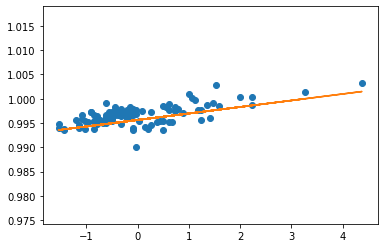

In [71]:
# load data
# x = np.genfromtxt('ass1_data/data/q1/linearX.csv', delimiter=',')
# y = np.genfromtxt('ass1_data/data/q1/linearY.csv', delimiter=',')

plt.scatter(x[:, 1, 0], y)
plt.plot(x[:, 1, 0], [hypothesis(theta, xi)[0] for xi in x], 'C1')
plt.show()

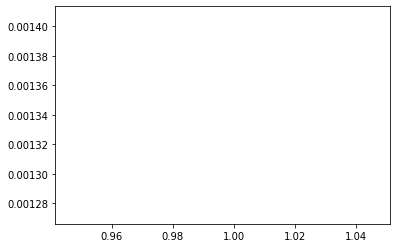

[[0.99635129]
 [0.00133983]]


In [49]:
theta0 = np.linspace(-4, 4, 40)
theta1 = np.linspace(-4, 4, 40)

X, Y = np.meshgrid(theta0, theta1)
# Z = f(X, Y)
def f(theta0, theta1):
    theta = np.array([[theta0],
                        [theta1]])
    return cost(theta)


Z = f(X, Y)
Z = Z.reshape((40, 40))
# fig = plt.figure()

# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='binary')
# fig, ax = plt.subplots(1, 1)
# ax.contour(X, Y, Z)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
plt.plot(theta[0], theta[1], 'C2')
plt.show()
# temp = np.linspace(0,1,20)
# ax.plot3D(temp, temp, temp, 'red')
print(theta)

# x0 = []
# x1 = []
# for theta, cost in thetas_and_costs:
#     x0.append(theta[0][0])
#     x1.append(theta[1][0])
# #     fig = plt.figure()

# #     # ax = plt.axes(projection='3d')
# #     # ax.contour3D(X, Y, Z, 50, cmap='binary')
# #     fig, ax = plt.subplots(1, 1)
# #     ax.contour(X, Y, Z)
#     # ax.set_xlabel('x')
#     # ax.set_ylabel('y')
#     # ax.set_zlabel('z')
#     plt.plot(x0, x1, markersize=50)
#     plt.draw()
#     plt.pause(0.2)
    

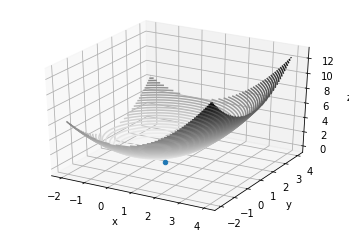

In [72]:
import time

theta0 = np.linspace(-2, 4, 30)
theta1 = np.linspace(-2, 4, 30)

X, Y = np.meshgrid(theta0, theta1)
# Z = f(X, Y)
def f(theta0, theta1):
    theta = np.array([[theta0],
                        [theta1]])
    return cost(theta)


Z = f(X, Y)
Z = Z.reshape((30, 30))

fig = plt.figure()

ax = plt.axes(projection='3d')

for theta, cost in thetas_and_costs:
#     print(theta, cost)
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    temp = np.linspace(0,1,20)
    ax.scatter3D([theta[0]], [theta[1]], cost, 'red')
    plt.show()
    plt.pause(0.2)

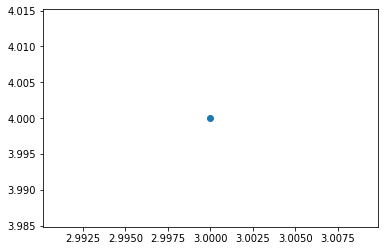

In [51]:
plt.scatter([3], [4])